In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Contour plot function

In [201]:

def contourPlot(f, x_val, ax, sizex, sizey, fig):
    xv=np.linspace(-sizex,sizex,30)
    yv=np.linspace(-sizey,sizey,30)
    xx, yy = np.meshgrid(xv, yv)
    #the element in position xx[i, j] is the x-coordinate of the intersection i, j into the grid

    #compute the value of f over the grid
    zz=f((xx, yy))
    #plot conrour plot
    cont=ax.contour(xx, yy, zz, levels=10, corner_mask=True)
    #fig.colorbar(cont)
    plt.title("contour plot")
    ax.plot(x_val[0], x_val[1], "o-")


## BACKTRACKING algorithm

In [139]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

## GRADIENT DESCENT
implement gradient descent algorithm with following parameters:
loss function (f), its gradient, strarting guess, two stopping criterions (tolf and tolx), and max number of iterations (kmax).
As outputs we want:
- x -> stationary point
- f_val -> the vector containing the values of f during the iterations
- err_vall -> vector containing the values of ||grad_f(x, k)||

we have a fixed stepsize (alpha=1)

(1,)


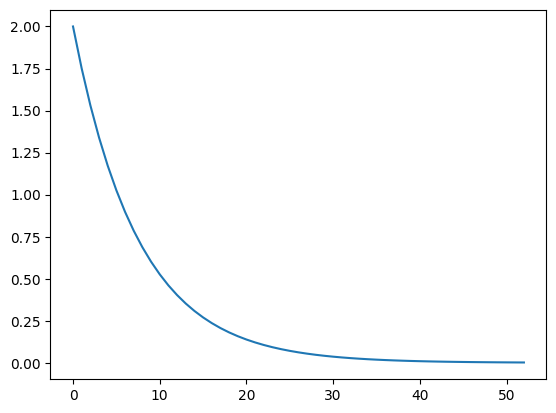

In [171]:
def GD(f, grad_f, x0, tolf, tolx, kmax):
    #initialization
    a=1 #stepsize
    f_val=np.zeros((kmax,))
    err_val=np.zeros((kmax,))
    #if(x_val.shape)
    x_val=[]
    x_val.append(x0)
    #iterations
    k=0
    conditions=True
    while (conditions):
        #update a
        if(k!=0):
            a=backtracking(f, grad_f, x)
        #update x
        x=x0-a*grad_f(x0)
        #store values
        f_val[k]=f(x)
        err_val[k]=np.linalg.norm(grad_f(x))
        x_val.append(x)
        #update k
        k+=1
        #update conditions
        stopcond1=np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x_val[0])) 
        stopcond2=np.linalg.norm(x-x0) > tolx*np.linalg.norm(x_val[0])
        conditions=k<kmax-1 and stopcond1 and stopcond2
        #restart
        x0=x
    #truncate vectors -> not mandatory (visualization purposes in case of convergence in k 
    f_val=f_val[:k]
    err_val=err_val[:k]
    return x_val, f_val, err_val

def f(x):
    return x**2 +2*x +1

def grad_f(x):
    return 2*x+2

x0=np.array((0,))
print(x0.shape)
x_val, f_val, err_val=GD(f, grad_f, x0, 1e-3, 1e-3, 60)
plt.plot(err_val)


Gradient descent for: $$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$$
Whose gradient is: $(2x_1 -6, 2x_2-2)$

final value:[3.00289428 1.00096476]
(54, 2)


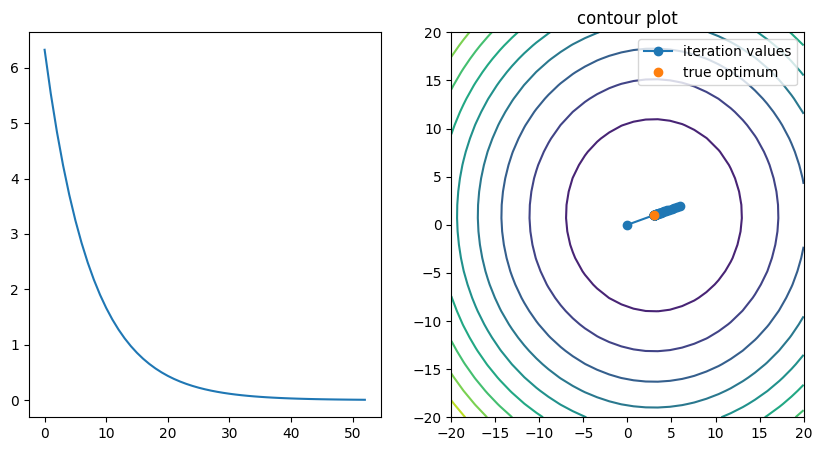

In [205]:
def f1(x):
    res=(x[0]-3)**2 + (x[1]-1)**2
    return res
def grad_f1(x):
    return np.array((2*x[0] -6, 2*x[1]-2))

x0=np.array((0,0))
#print(x0.shape)
x_val, f_val, err_val=GD(f1, grad_f1, x0, 1e-3, 1e-3, kmax=500)
print(f"final value:{x_val[-1]}")
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,5))
ax1.plot(err_val)
x_val=np.array(x_val)
print(x_val.shape)
contourPlot(f1, x_val.T, ax2, sizex=20, sizey=20, fig=fig)
ax2.plot(3,1, "o")
plt.legend(["iteration values", "true optimum"])


Gradient descent for: $$f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$
Whose gradient is: $(20x_1 -20, 2x_2-4)$

final value:[1.14266753 3.23158079]


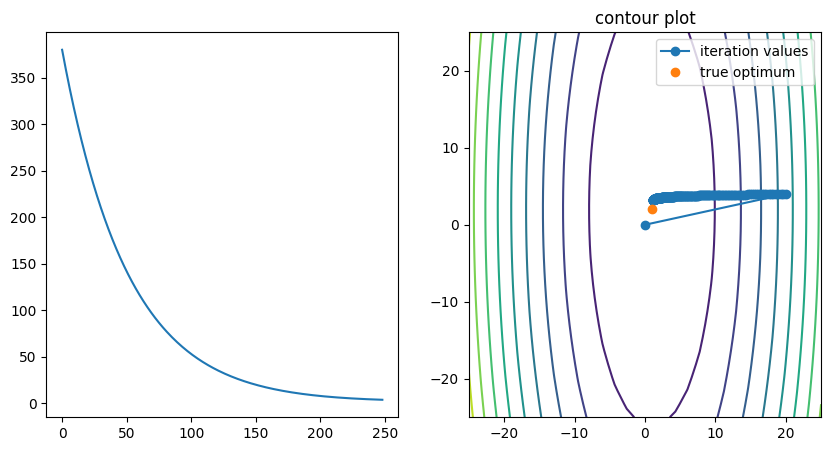

In [195]:
def f2(x):
    res=10*(x[0]-1)**2 + (x[1]-2)**2
    return res
def grad_f1(x):
    return np.array((20*x[0] -20, 2*x[1]-4))

x0=np.array((0,0))
x_val2, f_val, err_val2=GD(f1, grad_f1, x0, 1e-2, 1e-2, 250)
print(f"final value:{x_val2[-1]}")
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,5))
ax1.plot(err_val2)
x_val2=np.array(x_val2)
contourPlot(f2, x_val2.T, ax2, sizex=25, sizey=25, fig=fig)
ax2.plot(1,2, "o")
plt.legend(["iteration values", "true optimum"])

(1,)


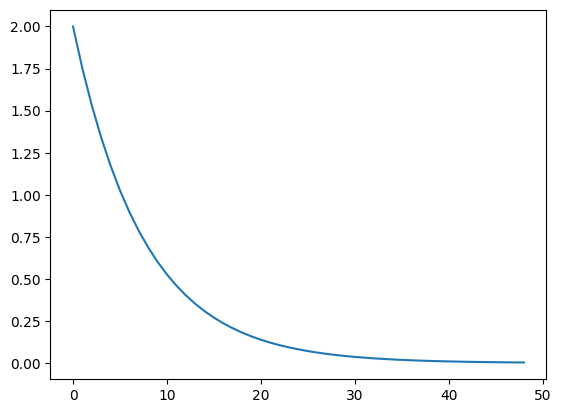

In [169]:
#fifth function
def f5(x):
    res=x**4+x**3-2*x**2-2*x
    return res
def grad_f1(x):
    return 4*x**3+3*x**2-4*x-2

x0=np.array((0,))
print(x0.shape)
x_val, f_val, err_val=GD(f, grad_f, x0, 1e-6, 1e-6, 50)
plt.plot(err_val)